In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('HACKATHON dataset\BTCUSDT_1h_2024.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\itsay\AppData\Local\Temp\ipykernel_27124\1905550052.py:1: SyntaxWarning: invalid escape sequence '\B'
  df=pd.read_csv('HACKATHON dataset\BTCUSDT_1h_2024.csv')


,datetime,open,high,low,close,volume
0,2024-01-01 05:30:00,42283.58,42554.57,42261.02,42475.23,1271.68108
1,2024-01-01 06:30:00,42475.23,42775.00,42431.65,42613.56,1196.37856
2,2024-01-01 07:30:00,42613.57,42638.41,42500.00,42581.10,685.21980
3,2024-01-01 08:30:00,42581.09,42586.64,42230.08,42330.49,794.80391
4,2024-01-01 09:30:00,42330.50,42399.99,42209.46,42399.99,715.41760


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  2881 non-null   object 
 1   open      2881 non-null   float64
 2   high      2881 non-null   float64
 3   low       2881 non-null   float64
 4   close     2881 non-null   float64
 5   volume    2881 non-null   float64
dtypes: float64(5), object(1)
memory usage: 135.2+ KB


1. Handling Missing Values


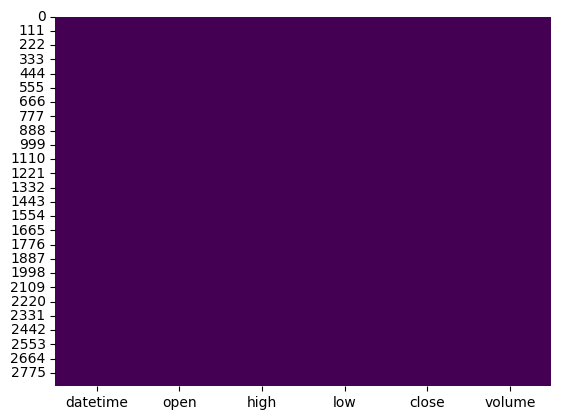

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Visualize missing values using a heatmap
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [12]:
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle missing values in non-numeric columns (e.g., datetime column)
# Here, we fill missing dates with the most frequent date as an example
df['datetime'] = df['datetime'].fillna(df['datetime'].mode()[0])


2. Removing Any Outliers

Winsorization
Winsorization involves replacing the smallest and largest values in the data with specific percentiles of the data. This reduces the impact of outliers by bringing extreme values closer to the central part of the data distribution.

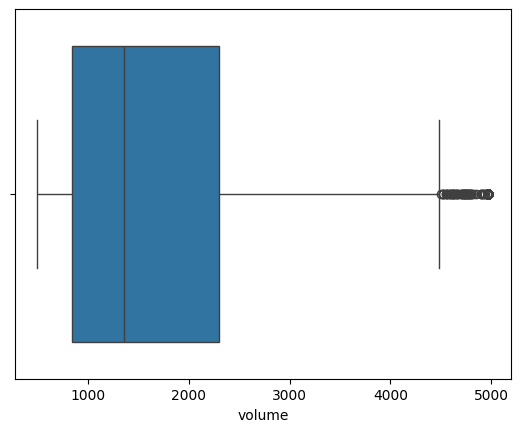

In [47]:
# Use box plots to visualize outliers
import seaborn as sns

sns.boxplot(x=df['volume'])
plt.show()

# Calculate z-scores to identify outliers
from scipy.stats import zscore

z_scores = zscore(df['volume'])
non_outliers = (z_scores <= 3) & (z_scores >= -3)
from scipy.stats.mstats import winsorize
df['volume'] = winsorize(df['volume'], limits=[0.05, 0.05])
df_filtered = df[non_outliers]
# Used this on all the colums but found outliers only in volume

3. Cleaning and Preprocessing


In [54]:
df_filtered['datetime'] = pd.to_datetime(df_filtered['datetime'])
df_filtered.drop_duplicates(inplace=True)


C:\Users\itsay\AppData\Local\Temp\ipykernel_27124\1887281092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['datetime'] = pd.to_datetime(df_filtered['datetime'])
C:\Users\itsay\AppData\Local\Temp\ipykernel_27124\1887281092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop_duplicates(inplace=True)
